<a href="https://colab.research.google.com/github/Meemansha-spec/meem.github.io/blob/master/fashion_msnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
!pip install keras

In [3]:
from tensorflow import keras
keras.__version__

'2.4.0'

In [4]:
import pandas as pd
import numpy as np

## Use `callback` to stop training

In [63]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self , epoch,logs = {}):
    if(logs.get('loss')<0.2):
      print('\n Loss is so low canceling training!')
      self.model.stop_training = True

In [64]:
callbacks = myCallback()

In [83]:
fashion_mnist = keras.datasets.fashion_mnist

In [84]:
(train_images , train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

In [47]:
train_images.shape

(60000, 28, 28)

In [48]:
train_labels.shape

(60000,)

4
[[  0   0   0   0   0   0   0   0   0   0  90 156 177 182 196 176 117   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 239 253 239 214 226 214 231 245 248
    0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  36 241 203 219 192 190 193 207 200 232
  135   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0  33 167 227 229 234 228 234 244 215 211 214
  208 120   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0 157 227 207 207 229 229 232 207 241 227 235 224
  203 221 176   0   0   2   0   0   0   0]
 [  0   0   0   0   0  65 218 189 192 187 196 189 188 202 181 195 222 219
  190 180 217 125   0   0   0   0   0   0]
 [  0   0   0   0   0 158 213 196 196 191 188 186 179 192 177 192 126 155
  193 189 200 166   0   0   0   0   0   0]
 [  0   0   0   0   0 163 217 211 176 188 188 186 183 196 180 191 165 170
  216 204 200 195   0   0   0   0   0   0]
 [  0   0   0   0   0 183 215 234 185 182 186 183 184 198 181 

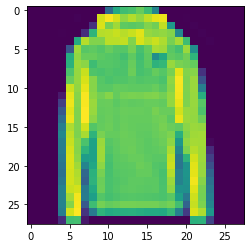

In [49]:
import matplotlib.pyplot as plt
plt.imshow(train_images[24])
print(train_labels[24])
print(train_images[24])

In [50]:
train_images = train_images / 255.0
test_images = test_images /255.0

Build MLP with two hidden layers

In [51]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape = (28,28)),
tf.keras.layers.Dense(512,activation = tf.nn.relu),
tf.keras.layers.Dense(10 , activation = tf.nn.softmax)
])

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.layers

## Compiling the model

In [65]:
model.compile(optimizer = 'adam',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
history = model.fit(train_images,train_labels,epochs = 10,callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3280 - accuracy: 0.8793
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2942 - accuracy: 0.8903
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2789 - accuracy: 0.8966
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2610 - accuracy: 0.9034
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2527 - accuracy: 0.9060
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2395 - accuracy: 0.9086
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2254 - accuracy: 0.9150
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2168 - accuracy: 0.9188
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2087 - accuracy: 0.9227
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.199

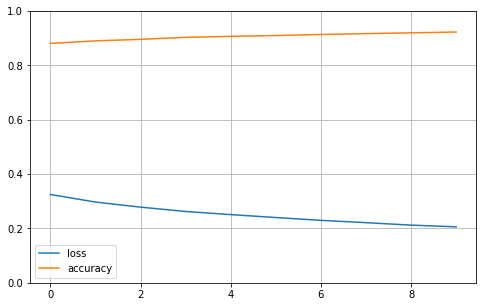

In [67]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [68]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3552 - accuracy: 0.8848


[0.3552361726760864, 0.8848000168800354]

## Using model to make predictions

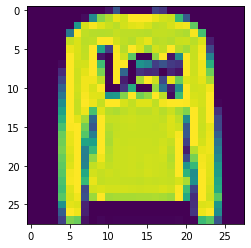

In [77]:
plt.imshow(test_images[1])

In [80]:
y_predict = model.predict(test_images[:1])
y_predict

array([[3.3052663e-10, 5.4548570e-15, 3.5948878e-14, 8.9511861e-18,
        4.4360240e-13, 6.2087311e-05, 2.5671986e-12, 5.8629934e-04,
        1.9907033e-11, 9.9935156e-01]], dtype=float32)

## Mnist hand written data

In [81]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3392 - accuracy: 0.9007
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0842 - accuracy: 0.9741
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0338 - accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0256 - accuracy: 0.9920

Reached 99% accuracy so cancelling training!


## Fashion mnist with pooling

In [115]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

In [116]:
train_images = train_images.reshape(60000,28,28,1) ## 1 is for color
test_images = test_images.reshape(10000,28,28,1)

In [117]:
train_images = train_images /255.0
test_images = test_images /255.0

In [118]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (28,28,1)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation = 'relu'),

tf.keras.layers.Dense(10,activation = 'softmax')
])

In [119]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [120]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [122]:
model.fit(train_images,train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.3845 - accuracy: 0.8594
Epoch 2/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2759 - accuracy: 0.8984
Epoch 3/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2287 - accuracy: 0.9140
Epoch 4/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1945 - accuracy: 0.9270
Epoch 5/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1638 - accuracy: 0.9383
Epoch 6/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1375 - accuracy: 0.9480
Epoch 7/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1159 - accuracy: 0.9561
Epoch 8/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0982 - accuracy: 0.9631
Epoch 9/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0808 - accuracy: 0.9694
Epoch 10/10
1875/1875 [==============================] - 86s 46m

In [123]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.3336 - accuracy: 0.9140


[0.33362653851509094, 0.9139999747276306]

## Visualize the data

In [124]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


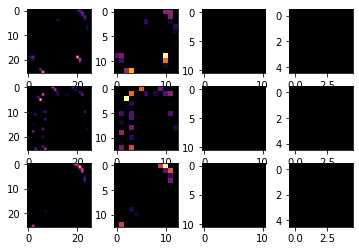

In [125]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 4
SECOND_IMAGE = 7
THIRD_IMAGE = 10
CONVOLUTION_NUMBER = 4
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input , outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER],cmap = 'inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap = 'inferno')
  axarr[1,x].grid(False)
  f3 =  activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER],cmap = 'inferno')
  axarr[2,x].grid(False)
